# Stats

# 1. Conditional probabilities and Bayes theorem

$P(Y|X)$ 

$Y$ occurs only if $X$ occurred, thus narrowing the set of possibilities.  Events $X$ and $Y$ are independent if and only if $P(Y|X)=P(Y)$.

Multiplication rule:
$$
P(X \cap Y)=P(Y|X)P(X)
$$
If events are independent, 
$$
P(X \cap Y)=P(X)P(Y)
$$
In which case,
$$
P(Y|X)P(X)=P(X \cap Y)=P(X|Y)P(Y)
$$
which implies
$$
P(X|Y)=\frac{P(Y|X)P(X)}{P(Y)}
$$


Summation rule
$$
P(Y)=P(Y\cap X)+P(Y\cap \overline{X})=P(Y|X)P(X)+P(Y|\overline{X})P(\overline{X})
$$

Example.  A disease diagnosis is known to be $80\%$ accurate, and the rate of false positives is is $10\%$.  What is the level of confidence that a patient who receives a positive test actually has the disease if the overall disease incidence in the population is $0.05\%$?

Let's work out on the white board.

# 2. Discrete Random Variables
## 2.1. Mean and Variance as Measures of Central Tendency

The easiest way to think about a discrete random variable is as the representation of the simplest experiment: flipping a U.S. penny.  A discrete random variable represents all possible outcomes, and their associated probabilities.  In the flipping of a fair penny, the outcomes are ${heads, tails}$ with equal probability.

This easily extends to experiments with multiple (or multi-class) outcomes, such as rolling a die.

Data analysis amounts to some type of dimensionality reduction, such as computing the sum of a number of experimental outcomes.

There are many things to do with such dimensionality reduction.

Mean:
$$\mu=E[X]=\sum_k P(X=k)k$$
Variance:
$$\sigma^2=var[X]=E[(X-E[X])^2]=\sum_k P(X=k)(k-\mu)^2$$
Standard deviation:
$$\sigma[X]=\sqrt{var[E]}=\sqrt{\sum_k P(X=k)(k-\mu)^2}$$
Coefficient of variation:
$$
c_v=\frac{\sigma}{\mu}
$$
A corollary:
$$
E[X^2]=\sum_k P(X=k)k^2=\sum_k P(X=k)(k-\mu)^2+2\mu\sum_k P(X=k)k-\mu^2\sum_k P(X=k)=$$
$$\sigma^2+2\mu^2-\mu^2=\mu^2+\sigma^2.$$

$$
E[X+Y]=E[X]+E[Y]
$$$$
E[a X]=aE[X], var[aX]=a^2 var[X]
$$

If two variables are independent (i.e. $P(Y=y|X=x)=P(Y=y)$).
$$
E[XY]=E[X]E[Y]
$$$$
var[X+Y]=var[X]+var[Y]
$$$$
var[X-Y]=var[X]+var[-Y]=var[X]+var[Y]
$$

In [1]:
import numpy as np
from numpy import random
from scipy import stats
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
x=np.array(range(1,7))
p=np.array([1.0/6]*6)
mu=sum(p*x)
sigma2=sum(np.square(x-mu)*p)
print('Mean={0}'.format(mu))
print('Variance={0}'.format(sigma2))

Mean=3.5
Variance=2.91666666667


[0 0 1 2 3 4 5 6 5 4 3 2 1]


<Container object of 13 artists>

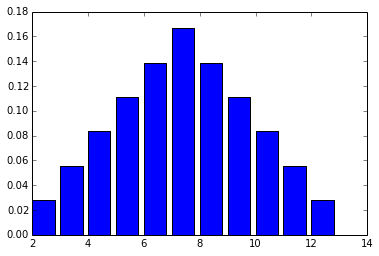

In [3]:
p=np.array([0]*13)
for i in range(1,7):
    for j in range(1,7):
        p[i+j]=p[i+j]+1
print(p)
p=p/1.0/sum(p)
s=np.array(range(0,13))
plt.bar(s,p)

In [4]:
mu=sum(s*p)
sigma2=sum(np.square(s-mu)*p)
print('Mean={0}'.format(mu))
print('Variance={0}'.format(sigma2))

Mean=7.0
Variance=5.83333333333


## 2.2. Bernoulli distribution
Flipping a coin or any other random event happening with a probability $p$:
$$
Bern(X=1|p)=p
$$$$
Bern(X=0|p)=1-p
$$$$
\mu=E[X]=1\cdot Bern(X=1|p)+0\cdot Bern(X=0|p)=p
$$$$
\sigma=\sqrt{(1-\mu)^2 Bern(X=1|p)+(0-\mu)^2 Bern(X=0|p)}=\sqrt{(1-p)^2+p^2(1-p)}=\sqrt{p(1-p)}.
$$

In [5]:
random.seed(2015)
sample = stats.bernoulli.rvs(p = 0.7, size = 50)
print(sample)
sum(sample)

[0 1 0 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 0
 1 1 0 1 1 0 1 1 1 1 0 1 1]


37

In [6]:
counts=[]
for i in range(0,10000):
    sample = stats.bernoulli.rvs(p = 0.7, size = 50)
    counts.append(sum(sample))
print(counts[0:100])

[38, 31, 31, 27, 34, 36, 36, 36, 31, 38, 33, 34, 34, 44, 35, 30, 39, 37, 36, 37, 30, 33, 32, 34, 37, 30, 38, 34, 29, 33, 33, 33, 38, 39, 34, 41, 36, 36, 34, 23, 38, 36, 39, 31, 38, 34, 39, 35, 37, 36, 41, 34, 30, 34, 36, 28, 42, 39, 35, 32, 40, 37, 32, 35, 32, 38, 35, 33, 35, 29, 40, 34, 38, 32, 40, 32, 36, 34, 42, 36, 39, 34, 36, 39, 37, 41, 33, 32, 30, 34, 33, 34, 36, 37, 37, 33, 36, 37, 38, 36]


Mean=34.9582
Standard deviation=3.21335537406


<Container object of 25 artists>

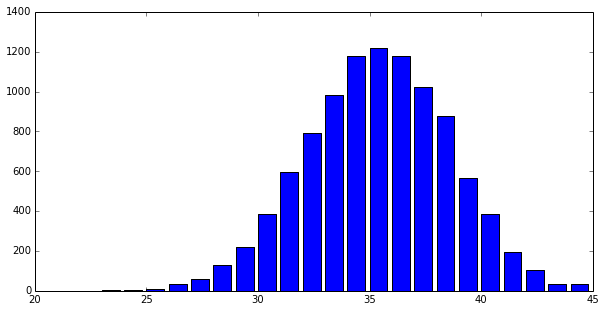

In [7]:
print('Mean={0}'.format(mean(counts)))
print('Standard deviation={0}'.format(std(counts)))
h=np.histogram(counts,range=(20,45),bins=25)
plt.figure(figsize = (10,5))
plt.bar(h[1][0:-1],h[0])

## 2.3. Binomial distribution
Number of successes of a series of random events
$$
Bin(X=k|n,p)=C^k_n p^k (1-p)^{n-k},
$$$$
C^k_n=\frac{n!}{(n-k)!k!}
$$$$
\mu=E[X]=pn
$$$$
\sigma[X]=\sqrt{np(1-p)}
$$

In [8]:
p=0.7
n=50
mu=p*n
sigma=sqrt(n*p*(1-p))
print('Mean={0}'.format(mu))
print('Standard deviation={0}'.format(sigma))
print(stats.binom.pmf(37, p=p, n=n))

Mean=35.0
Standard deviation=3.2403703492
0.105017451475


<Container object of 25 artists>

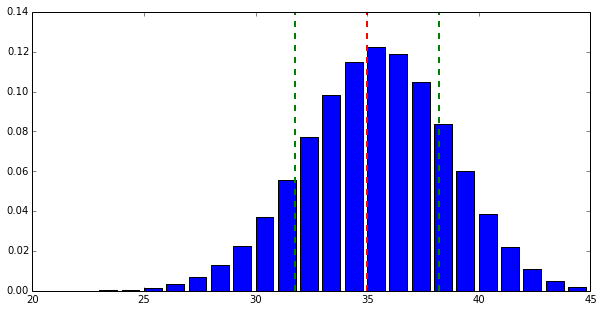

In [9]:
plt.figure(figsize = (10,5))
k=range(20,45)
plt.axvline(mu, color='r', ls='--', lw=2.0)
plt.axvline(mu-sigma, color='g', ls='--', lw=2.0)
plt.axvline(mu+sigma, color='g', ls='--', lw=2.0)
plt.bar(k,stats.binom.pmf(k, p=0.7, n=50))

## 2.4. Poisson distribution
Number of events happening with a certain frequency $\lambda$ (like device failures, crime, disasters)
$$
Poi(X=k|\lambda)=e^{-\lambda}\frac{\lambda^k}{k!}
$$$$
E[X]=var[X]=\lambda=\mu=\sigma^2
$$

Example: New house construction permits issued in Staten Island average at 700 per year. Assume construction permits are requested at a homogenous rate over time, i.e. their number follows Poisson distribution

Standard deviation range=(673,726), probability=0.692567740903


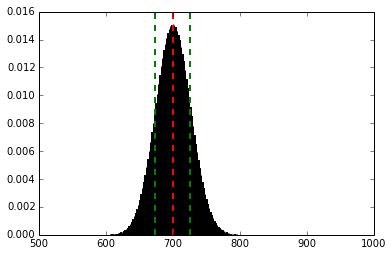

In [10]:
plt.figure()
k=range(500,1000,2)
mu=700
sigma=sqrt(mu)
plt.axvline(mu, color='r', ls='--', lw=2.0)
plt.axvline(mu-sigma, color='g', ls='--', lw=2.0)
plt.axvline(mu+sigma, color='g', ls='--', lw=2.0)
plt.bar(k,stats.poisson.pmf(k, mu=mu))
p=sum(stats.poisson.pmf(range(int(mu-sigma),int(sigma+mu+1)), mu=mu))
print('Standard deviation range=({0},{1}), probability={2}'.format(int(mu-sigma),int(sigma+mu),p))

Example: 25 named hurricanes hit Bermuda during 22 years from 1991 till 2012. Given this statistics, what is the probability of getting at least 3 hurricanes during the same year (it actually happened in 1998)?

0.107014227808


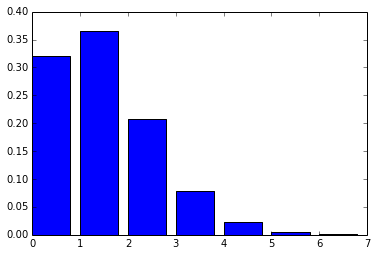

In [11]:
plt.figure()
k=range(0,7)
mu=25.0/22
plt.bar(k,stats.poisson.pmf(k, mu=mu))
print(1-sum(stats.poisson.pmf(range(0,3), mu=mu)))

# 3. Continous distributions

## 3.1. Mean, Variance and Quantiles

Mean:
$$
\mu=E[X]=\int\limits_x x p(x)dx=\int x d P
$$
Variance:
$$
\sigma^2=var[X]=E[(X-E[X])^2]=\int\limits_x (x-\mu)^2 p(x)dx
$$
Quantile:
$$
x_\alpha=F^{-1}(\alpha); P(X\leq x_\alpha)=\alpha
$$
$$
E[X+Y]=E[X]+E[Y]
$$$$
E[qX]=qE[X]; var[qX]=q^2 var[X].
$$
The following holds for independent variables X and Y only (i.e. $P(Y=y|X=x)=P(Y=y)$)
$$
var[X+Y]=var[X]+var[Y], \sigma[X+Y]=\sqrt{\sigma[X]^2+\sigma[Y]^2}.
$$$$
E[XY]=E[X]E[Y]
$$

## 3.2. Uniform distribution

Random variable uniformly distributed over a certain interval
$$
Unif(x|a,b)=\frac{1}{b-a} I(a\leq x\leq b)
$$
$$
\mu=E[X]=\frac{a+b}{2}
$$$$
\sigma[X]=\frac{(b-a)}{2\sqrt{3}}
$$

(0, 1.1)

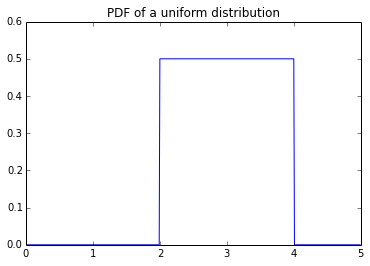

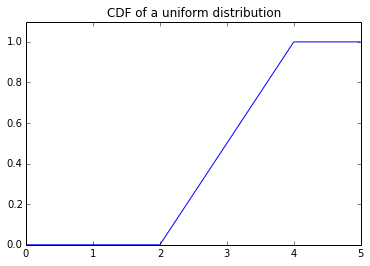

In [12]:
plt.figure()
x=np.array(range(0,500))*0.01
a=2
b=4
w=b-a
plt.title('PDF of a uniform distribution')
plt.plot(x,stats.uniform.pdf(x,a,w))
plt.ylim([0,0.6])
plt.figure()
plt.title('CDF of a uniform distribution')
plt.plot(x,stats.uniform.cdf(x,a,w))
plt.ylim([0,1.1])

## 3.3. Normal distribution

Perhaps the most important continous distribution because it represents a number of real-world processes (for examle physics, biology and finance).

### Central limit theorem: 
a sample average $\overline{X}=\frac{\sum\limits_i X_i}{N}$ of a random sample of N instances ${X_1,X_2,...,X_N}$ of a random variable $X$ ($E[X]=\mu$, $std[X]=\sigma$) has a distribution close to normal ${\cal N}(\overline{X}|\mu,\sigma^2/N)$ for large $N$. 

Rigorously
$$
\sqrt{N}(\overline{X}-\mu)\to {\cal N}(0,\sigma^2),
$$
while $N\to\infty$.

Probability density function:
$$
{\cal N}(X=x|\mu,\sigma^2)=\phi(x|\mu,\sigma^2)=\frac{1}{\sqrt{2\pi}\sigma}e^{-\frac{(x-\mu)^2}{2\sigma^2}}
$$

Cumulative distribution function
$$
\Phi(x|\mu,\sigma^2)=\int\limits_{-\infty}^x \frac{1}{\sqrt{2\pi}\sigma}e^{-\frac{(t-\mu)^2}{2\sigma^2}}dt
$$

Sum of independent normally distributed random variables is also normally distributed.

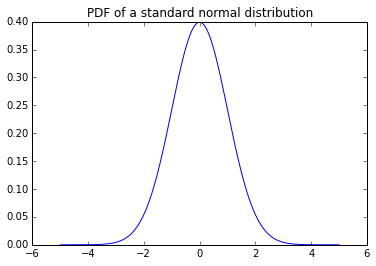

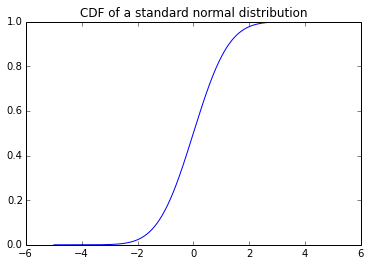

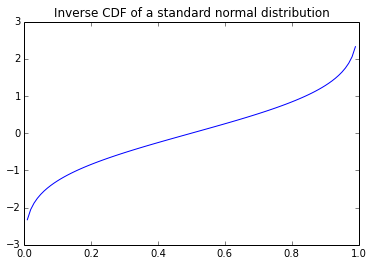

In [13]:
plt.figure()
x=np.array(range(-500,501))*0.01
plt.title('PDF of a standard normal distribution')
plt.plot(x,stats.norm.pdf(x,0,1))
plt.figure()
plt.title('CDF of a standard normal distribution')
plt.plot(x,stats.norm.cdf(x,0,1))
plt.figure()
plt.title('Inverse CDF of a standard normal distribution')
x=np.array(range(0,101))*0.01
plt.plot(x,stats.norm.ppf(x,0,1))

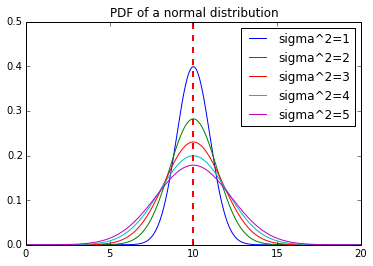

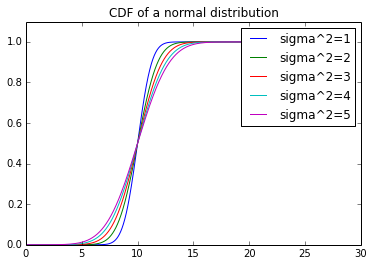

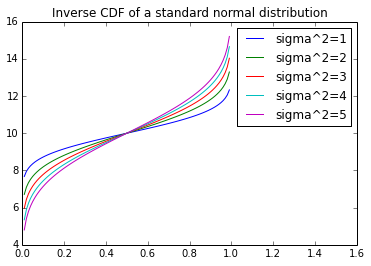

In [14]:
plt.figure()
x=np.array(range(0,2000))*0.01
mu=10
plt.title('PDF of a normal distribution')
for sigma2 in range(1,6):
    plt.plot(x,stats.norm.pdf(x,mu,sqrt(sigma2)),label='sigma^2={0}'.format(sigma2))
plt.legend()
plt.axvline(mu, color='r', ls='--', lw=2.0)
plt.ylim([0,0.5])
plt.figure()
plt.title('CDF of a normal distribution')
for sigma2 in range(1,6):
    plt.plot(x,stats.norm.cdf(x,mu,sqrt(sigma2)),label='sigma^2={0}'.format(sigma2))
plt.ylim([0,1.1])
plt.xlim([0,30])
plt.legend()
plt.figure()
plt.title('Inverse CDF of a standard normal distribution')
x=np.array(range(0,101))*0.01
plt.xlim([0,1.6])
for sigma2 in range(1,6):
    plt.plot(x,stats.norm.ppf(x,mu,sqrt(sigma2)),label='sigma^2={0}'.format(sigma2))
plt.legend()

But in spite of visual variaty of forms, actually all the normally distributed variables $X\sim {\cal N}(\mu,\sigma)$ could be easily derived from a single standard normal distritution $X_0\sim {\cal N}(0,1)$ as following: $X=X0\sigma+\mu$.

So knowing properties of ${\cal N}(0,1)$ we can easily judge about all ${\cal N}(\mu,\sigma)$. For example good to remember the scale of quantiles:

In [15]:
print(stats.norm.ppf(0.95,0,1))
print(stats.norm.ppf(0.99,0,1))
print(stats.norm.ppf(0.999,0,1))

1.64485362695
2.32634787404
3.09023230617


So if for example daily energy usage of the building is known to be normally distributed with a mean of $\mu=10Mwh$ and standard deviation $\sigma=3MWh$, and we want to plan an energy supply system which will have enough capacity to satisfy hourly demand in $99.9\%$ of cases, then it's maximal capacity should be planned as approx $10+3*3=19Mwh$.

In many real-world cases not the quantity considered but rather its logarithm happens to be distributed normally (e.g. activity of customers, population of cities etc)

## 3.4. Lognormal Distribution 
$log(X)\sim {\cal N}(\mu,\sigma^2)$

(0, 1.1)

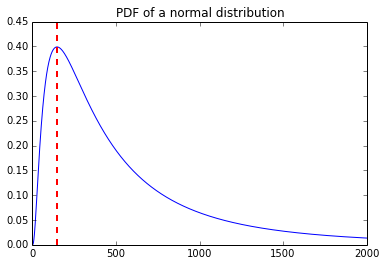

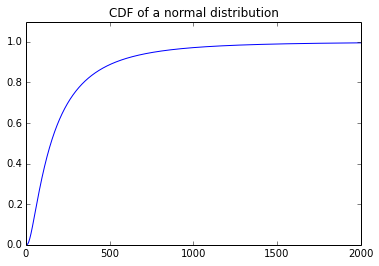

In [16]:
plt.figure()
x=np.array(range(1,2000))*1.0
mu=5
sigma=1
plt.title('PDF of a normal distribution')
plt.plot(x,stats.norm.pdf(log(x),mu,sigma))
plt.axvline(exp(mu), color='r', ls='--', lw=2.0)
plt.ylim([0,0.45])
plt.figure()
plt.title('CDF of a normal distribution')
plt.plot(x,stats.norm.cdf(log(x),mu,sigma))
plt.ylim([0,1.1])

## 3.5. Other useful distributions

### Logistic Distribution

Probability Density Function
$Logist(X=x)=F^\prime(x)=\displaystyle{\frac{\exp(-x)}{1+\exp(-x)}}$

Cumulative Density Function
$F(x)=\displaystyle{\frac{1}{1+\exp(-x)}}$

$$
\mu=E[X]=0, \sigma[X]=\pi/\sqrt{3}.
$$

### Exponential Distribution

Probability Density Function
$$
Exp(X=x|\lambda)=\left\{\begin{array}{ll}\lambda e^{-\lambda x}, & x\geq 0\\0,& x<0 \end{array}\right.
$$

Cumulative Density Function
$$
F(x)=\left\{\begin{array}{ll}1-e^{-\lambda x}, & x\geq 0\\0, & x<0\end{array}\right.
$$

$$
\mu=E[X]=\sigma[X]=1/\lambda
$$

### Laplace Distibution

Another related distribution is:

$$
Laplace(X=x|\mu,\sigma)=\frac{1}{\sqrt{2}\sigma}e^{-\frac{\sqrt{2}|x-\mu|}{\sigma}}
$$

If $X\sim Laplace$ then $|X-E[X]|\sim Exp$. Also difference between two identically distributed exponential random variables follows a Laplace distribution. 

### Pareto Distribution

$$
Pareto(X=x|x_m,\alpha)=\left\{\begin{array}{ll}\frac{\alpha x_m^\alpha}{x^{\alpha+1}}, & x\geq x_m,\\
0, & x<x_m.\end{array}\right.
$$

Continous version of often observed discrete power-law distributions, like Zipf law.

### Gamma and Beta Distributions
$$
Gamma (X=x|\alpha,\beta)=\frac{\beta^\alpha x^{\alpha-1} e^{-x\beta}}{\Gamma(\alpha)}
$$$$
Beta(X=x|\alpha,\beta)=\frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\Gamma(\beta)}x^{\alpha-1}(1-x)^{\beta-1}
$$